Population size: 3000
Infected at t=0: 7
R0= 1.95
[0.00000000e+00 3.86415687e-01 8.53316979e-01 1.41719974e+00
 2.09781781e+00 2.91877017e+00 3.90816835e+00 5.09938258e+00
 6.53185803e+00 8.25198173e+00 1.03139648e+01 1.27806829e+01
 1.57243903e+01 1.92271860e+01 2.33810729e+01 2.82874069e+01
 3.40555009e+01 4.08001329e+01 4.86377292e+01 5.76810756e+01
 6.80325602e+01 7.97761868e+01 9.29688926e+01 1.07632012e+02
 1.23743975e+02 1.41235403e+02 1.59987623e+02 1.79835219e+02
 2.00572620e+02 2.21964129e+02 2.43756206e+02 2.65690568e+02
 2.87516654e+02 3.09002276e+02 3.29941705e+02 3.50160889e+02
 3.69519909e+02 3.87913060e+02 4.05267092e+02 4.21538164e+02
 4.36708061e+02 4.50780086e+02 4.63774964e+02 4.75726995e+02
 4.86680578e+02 4.96687196e+02 5.05802864e+02 5.14086036e+02
 5.21595930e+02 5.28391228e+02 5.34529088e+02 5.40064438e+02
 5.45049478e+02 5.49533372e+02 5.53562072e+02 5.57178256e+02
 5.60421348e+02 5.63327601e+02 5.65930213e+02 5.68259489e+02
 5.70343005e+02 5.72205794e+02 5.73

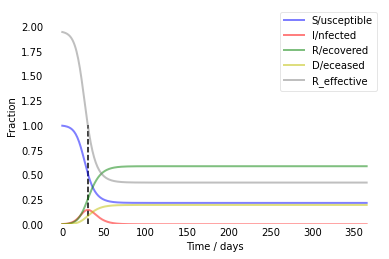

In [2]:
# Basic SIRD model (adapted)
###### (a)
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0, D0 = 7, 0, 0 #case zero

#N = S0 + I0 + R0 + D0
S0 = N - I0 - R0 - D0 #normalization

# Contact rate, beta; recovery rate, gamma; mortality rate mu
beta, gamma, mu = 0.39, 0.15, 0.05

# Basic reproduction number R0 (R nought), average number of individuals that can get infected which will not change over time.
R_nought = beta / (gamma + mu)

# R_effective = R_nought * S/N

print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 365, 365)

# SIRD model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma,mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

#1/gamma average time to recover

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T # return vector

print(D)
#find R_effective = 1 time
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1: 
        t_1 = time
        break
print("R_eff=1 at t=", t_1, "d")
print("Deceased=", D[-1])

# Plot the data on four separate curves for S(t), I(t), R(t) and D(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

R_nought= 3.0  and mu= 0.004
Deceased= 73.29730633124544
R_eff=1 at t= 0 d


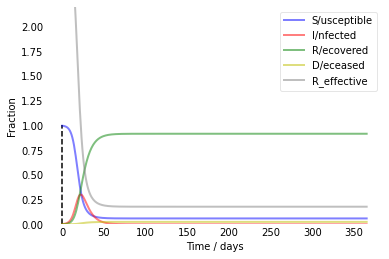

R_nought= 3.0  and mu= 0.008
Deceased= 142.88335664094717
R_eff=1 at t= 0 d


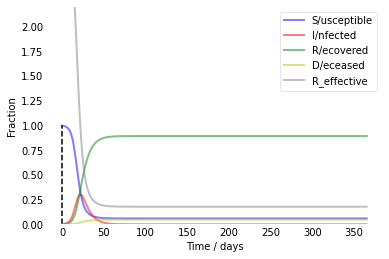

R_nought= 3.0  and mu= 0.01
Deceased= 176.3716445330983
R_eff=1 at t= 0 d


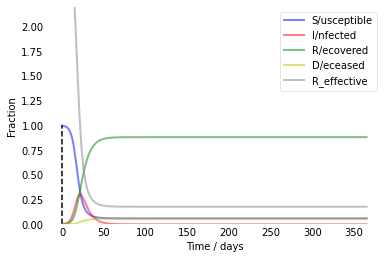

R_nought= 3.0  and mu= 0.02
Deceased= 331.9936820617285
R_eff=1 at t= 0 d


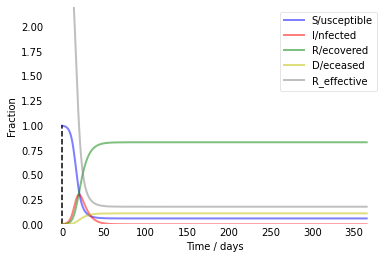

R_nought= 3.0  and mu= 0.03
Deceased= 470.32438354382873
R_eff=1 at t= 0 d


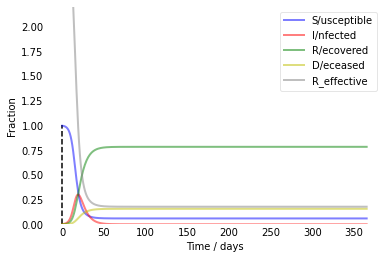

R_nought= 3.0  and mu= 0.04
Deceased= 594.0939576633351
R_eff=1 at t= 0 d


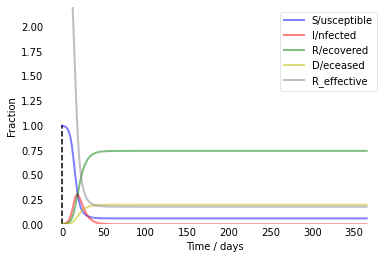

R_nought= 3.5  and mu= 0.004
Deceased= 75.27855796167266
R_eff=1 at t= 0 d


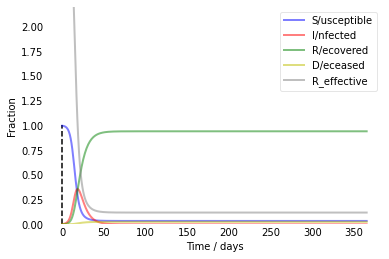

R_nought= 3.5  and mu= 0.008
Deceased= 146.745543366143
R_eff=1 at t= 0 d


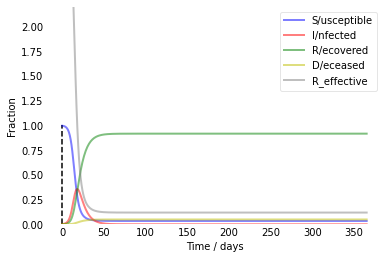

R_nought= 3.5  and mu= 0.01
Deceased= 181.13903009125983
R_eff=1 at t= 0 d


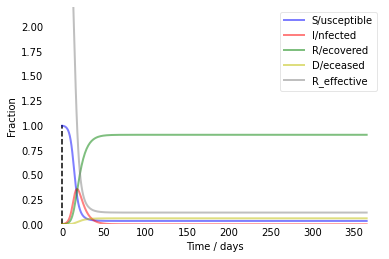

R_nought= 3.5  and mu= 0.02
Deceased= 340.96758604210913
R_eff=1 at t= 0 d


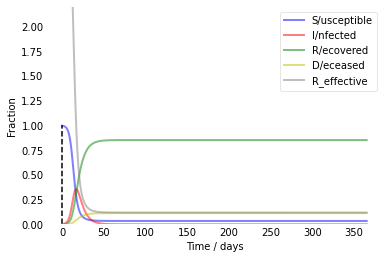

R_nought= 3.5  and mu= 0.03
Deceased= 483.0374135435397
R_eff=1 at t= 0 d


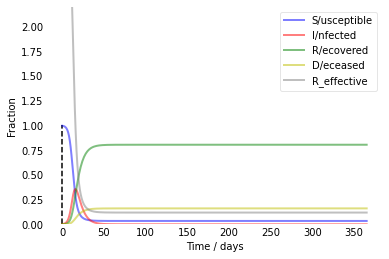

R_nought= 3.5  and mu= 0.04
Deceased= 610.1525223514975
R_eff=1 at t= 0 d


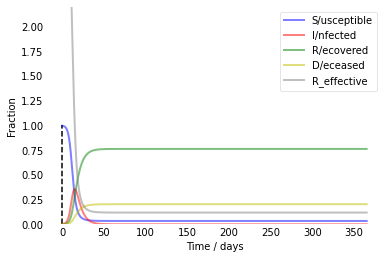

R_nought= 4.0  and mu= 0.004
Deceased= 76.3810002228594
R_eff=1 at t= 0 d


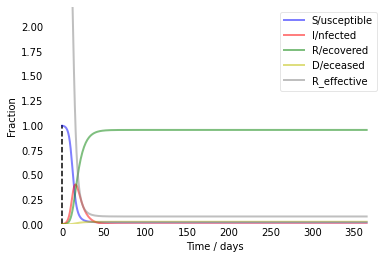

R_nought= 4.0  and mu= 0.008
Deceased= 148.89460802843794
R_eff=1 at t= 0 d


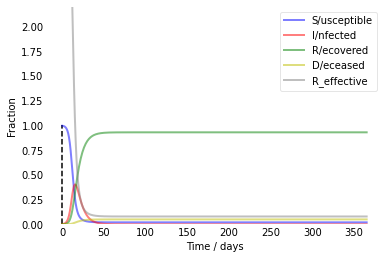

R_nought= 4.0  and mu= 0.01
Deceased= 183.791781784565
R_eff=1 at t= 0 d


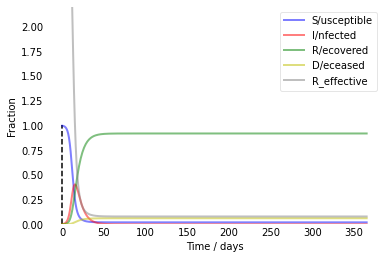

R_nought= 4.0  and mu= 0.02
Deceased= 345.9610010017951
R_eff=1 at t= 0 d


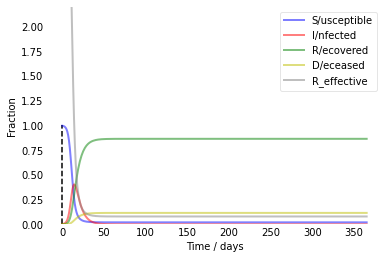

R_nought= 4.0  and mu= 0.03
Deceased= 490.11141808079424
R_eff=1 at t= 0 d


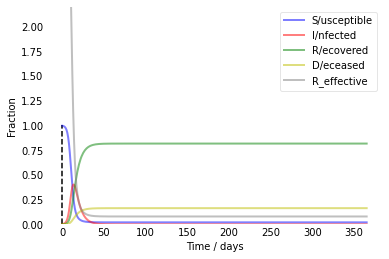

R_nought= 4.0  and mu= 0.04
Deceased= 619.0881070441969
R_eff=1 at t= 0 d


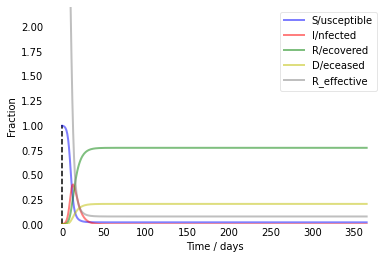

In [2]:
# Basic SIRD model (adapted)
# (b)
# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0, D0 = 7, 0, 0 #case zero

S0 = N - I0 - R0 - D0 #normalization

# SIRD model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma,mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Contact rate, beta; recovery rate, gamma; mortality rate mu
gamma = 0.15
R_nought = [3.0,3.5,4.0]
mu = [0.004, 0.008, 0.01, 0.02, 0.03, 0.04]

# at 365 day
t = np.linspace(0, 365, 365)

# Initial conditions vector
y0 = S0, I0, R0, D0
#R_effctive = np.zeros(len(t))
R_effctive = []
# Integrate the SIRD equations over the time grid, t.
for  basic_repr_nr in R_nought:
    for mortality_rate in mu:
        beta = basic_repr_nr*(gamma + mortality_rate)
        print("R_nought=", basic_repr_nr," and mu=",mortality_rate)
        ret = odeint(deriv, y0, t, args=(N, beta, gamma, mortality_rate))
        S, I, R, D = ret.T # return vector
        print("Deceased=", D[-1])
        R_effctive.append(basic_repr_nr*S/N)
        ##
        t_1 = 0
        for time in range(0,len(S)):
            if basic_repr_nr*S[time]/N < 1: 
                t_1 = time
            break
        print("R_eff=1 at t=", t_1, "d")
    ##
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
        ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
        ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
        ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
        ax.plot(t, basic_repr_nr*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
        ax.set_xlabel('Time / days')
        ax.set_ylabel('Fraction')
        ax.set_ylim(0,2.2)
        ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.show()
    #find R_effective = 1 time


# Plot the data on four separate curves for S(t), I(t), R(t) and D(t)


beta= 0.1
Deceased= 1.1584472944857294
R_eff=1 at t= 0 d


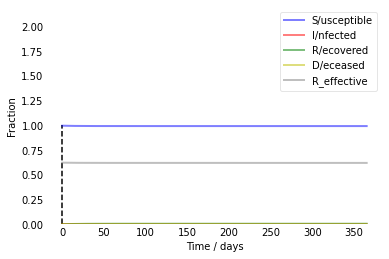

beta= 0.3
Deceased= 142.5179696692683
R_eff=1 at t= 0 d


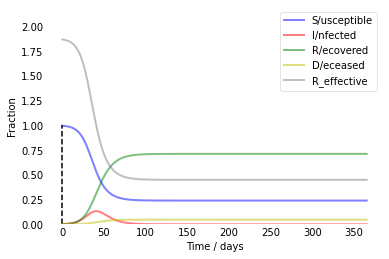

beta= 0.5
Deceased= 177.8463402447829
R_eff=1 at t= 0 d


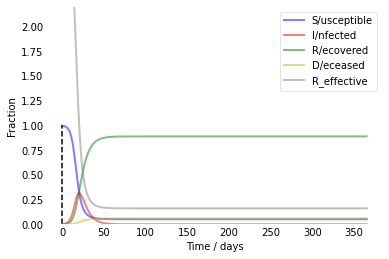

beta= 0.7
Deceased= 185.0040178815504
R_eff=1 at t= 0 d


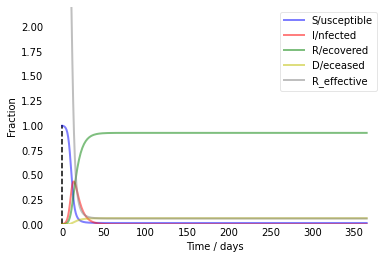

beta= 0.9
Deceased= 186.8112624786393
R_eff=1 at t= 0 d


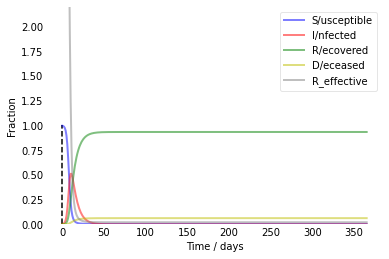

In [3]:
# Basic SIRD model (adapted)
# (c)
# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0, D0 = 7, 0, 0 #case zero

S0 = N - I0 - R0 - D0 #normalization

# SIRD model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma,mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Contact rate, beta; recovery rate, gamma; mortality rate mu
mu = 0.01
gamma = 0.15
beta = [.1,.3,.5,.7,.9]
# at 365 day
t = np.linspace(0, 365, 365)

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid, t.
for  infection_rate in beta:
        R_nought = infection_rate / (gamma +mu)
        print("beta=", infection_rate)
        ret = odeint(deriv, y0, t, args=(N, infection_rate, gamma, mu))
        S, I, R, D = ret.T # return vector
        print("Deceased=", D[-1])
        ##
        t_1 = 0
        for time in range(0,len(S)):
            if R_nought*S[time]/N < 1: 
                t_1 = time
            break
        print("R_eff=1 at t=", t_1, "d")
        ##
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
        ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
        ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
        ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
        ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
        ax.set_xlabel('Time / days')
        ax.set_ylabel('Fraction')
        ax.set_ylim(0,2.2)
        ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.show()

In [4]:
#
R_effctive = R_nought*S/N
